In [1]:
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.ticker import MaxNLocator, AutoLocator

import matplotlib as mpl
import numpy as np
import matplotlib.pylab as plt
import glob, pickle

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', lw=1)
plt.rc('axes',axisbelow=False)
color_pallete=['#377eb8','#4daf4a','#e41a1c','#ff7f00','#f781bf','#a65628','#999999']*3
params = { "xtick.direction": "in", "ytick.direction": "in"}#{"xtick.top": True, "ytick.right": True}#,
plt.rcParams.update(params)
%config InlineBackend.figure_format = 'retina'

In [2]:
IGNORE_PERCENT=20.0

### Parse density


In [6]:
def block_error(x,n):
    # Returns error estiumate using standard deviation for n blocks                                                                          
    # Reverse to use last part of x                                                                                                          
    x=x[::-1]
    return np.std([np.mean(x[len(x)//n*i:len(x)//n*(i+1)]) for i in range(n)])*1.96
def cum_avg(x):
    a=np.array(range(1,len(x)+1))
    return np.cumsum(x)/a
def block_error_komp(x,T,n):
    # Returns error estiumate using standard deviation for n blocks                                                                          
    # Reverse to use last part of x                                                                                                          
    kt= 4.11E-21*float(T)/298
    x=x[::-1]
    mean=np.mean([np.var(x[len(x)//n*i:len(x)//n*(i+1)])/(np.mean(x[len(x)//n*i:len(x)//n*(i+1)])*kt) for i in range(n)])
    error=np.std([np.var(x[len(x)//n*i:len(x)//n*(i+1)])/(np.mean(x[len(x)//n*i:len(x)//n*(i+1)])*kt) for i in range(n)])*1.96
    return mean, error

# Load data

In [7]:
# DATA=dict()
# out=[]
# for file in glob.glob('../../../../6-SupercooledWater/2-Simulations/Simulations/0.001katm_*K/thermo.out'):
#     key=file.split('/')[-2]
#     temp=file.split('/')[-2].split('_')[-1].strip('K')
#     press=file.split('/')[-2].split('_')[-2].strip('katm')

#     data=np.loadtxt(file)
#     DATA[key]=dict()
#     DATA[key]['density']=np.loadtxt(file)[:,7]
#     DATA[key]['vol']=np.loadtxt(file)[:,11]
#     DATA[key]['time']=np.loadtxt(file)[:,1]/1E3
#     nframes=len(DATA[key]['density'])

#     density=DATA[key]['density'][int(nframes*IGNORE_PERCENT/100.):]
#     err=block_error(density,4)
#     mean=density.mean()
#     print(key,nframes*0.5/1E3, 'ns')

#     vol=DATA[key]['vol'][int(nframes*IGNORE_PERCENT/100.):]*1E-10**3
#     mean2, error2=    block_error_komp(vol,float(temp),4)

    
#     out.append([float(press),float(temp),mean,err,mean2*1E11,error2*1E11])

In [8]:
# density_komp=np.array(out)
# density_komp=density_komp[np.argsort(density_komp[:,1])]
# np.savetxt('DATA/density_komp.dat',density_komp)

density_komp=np.loadtxt('DATA/density_komp.dat')

In [9]:
MBpol=np.loadtxt('REF/Ref_iso_comp_density.dat')
kim=np.loadtxt('REF/kappa_kim.dat')
speedy=np.loadtxt('REF/kappa_speedy.dat')
kell=np.loadtxt('REF/kappa_kell.dat')
holten=np.loadtxt('REF/rho_holten.dat')
wagner=np.loadtxt('REF/rho_wagner.dat')

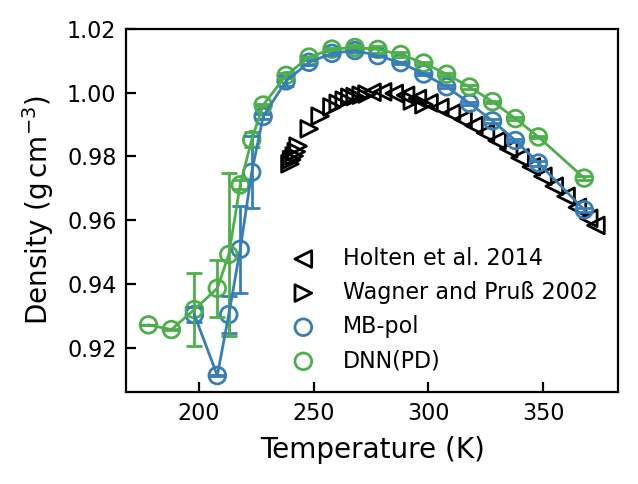

In [10]:
plt.figure(figsize=(3.33,2.5))

plt.scatter(wagner[:,0],wagner[:,1],color='k',label='Holten et al. 2014',marker='<',facecolors='none')
plt.scatter(holten[:,0],holten[:,1],color='k',label='Wagner and Pruß 2002',marker='>',facecolors='none')

plt.scatter(MBpol[:,0],MBpol[:,3],color=color_pallete[0],label='MB-pol',facecolors='none')
plt.errorbar(MBpol[:,0],MBpol[:,3],yerr=MBpol[:,4],color=color_pallete[0],capsize=3)
plt.scatter(density_komp[:,1],density_komp[:,2],color=color_pallete[1],facecolors='none',label='DNN(PD)')
plt.errorbar(density_komp[:,1],density_komp[:,2], yerr=density_komp[:,3],color=color_pallete[1],capsize=3)#,fmt='none')
plt.xlabel('Temperature (K)')
plt.ylabel('Density (g$\,$cm$^{-3}$)')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('DENSITY.png',dpi=300,  bbox_inches='tight',facecolor='white', pad_inches=0.01)

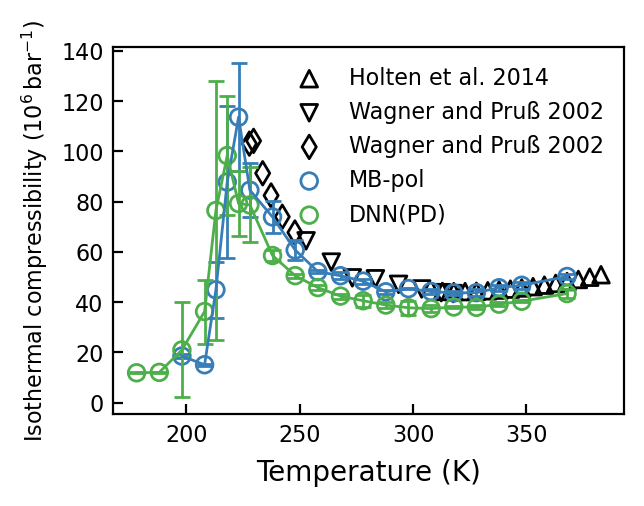

In [11]:

plt.figure(figsize=(3.33,2.5))
plt.scatter(kell[:,0],kell[:,1],color='k',label='Holten et al. 2014',marker='^',facecolors='none')
plt.scatter(speedy[:,0],speedy[:,1],color='k',label='Wagner and Pruß 2002',marker='v',facecolors='none')
plt.scatter(kim[:,0],kim[:,1],color='k',label='Wagner and Pruß 2002',marker='d',facecolors='none')

plt.scatter(MBpol[:,0],MBpol[:,1],color=color_pallete[0],label='MB-pol',facecolors='none')
plt.errorbar(MBpol[:,0],MBpol[:,1],yerr=MBpol[:,2],color=color_pallete[0],capsize=3)
plt.scatter(density_komp[:,1],density_komp[:,4],color=color_pallete[1],facecolors='none',label='DNN(PD)')
plt.errorbar(density_komp[:,1],density_komp[:,4], yerr=density_komp[:,5],color=color_pallete[1],capsize=3)#,fmt='none')
plt.xlabel('Temperature (K)')
plt.ylabel(r'Isothermal compressibility (10$^6\,$bar$^{-1}$)',size=8)
plt.legend(frameon=False,ncol=1)
plt.tight_layout()
plt.savefig('COMPRESSIBILITY.png',dpi=300,  bbox_inches='tight',facecolor='white', pad_inches=0.01)


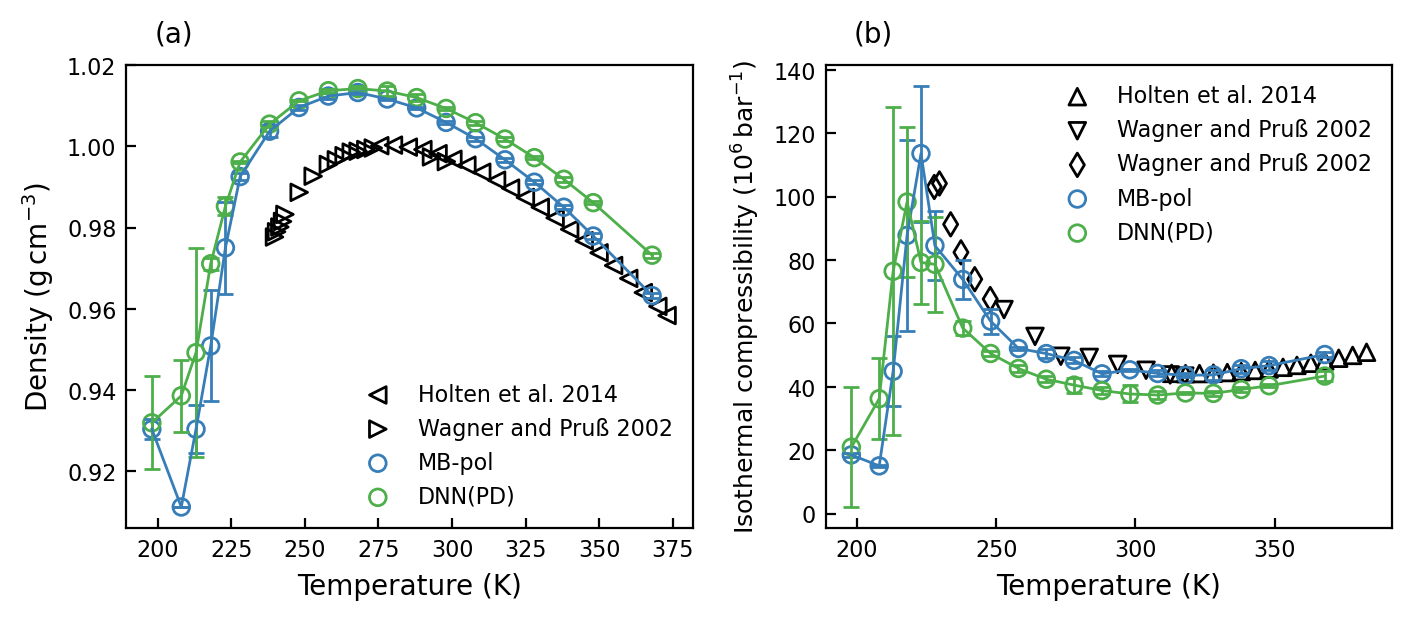

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(7.2,3))

ax1.scatter(wagner[:,0],wagner[:,1],color='k',label='Holten et al. 2014',marker='<',facecolors='none')
ax1.scatter(holten[:,0],holten[:,1],color='k',label='Wagner and Pruß 2002',marker='>',facecolors='none')

ax1.scatter(MBpol[:,0],MBpol[:,3],color=color_pallete[0],label='MB-pol',facecolors='none')
ax1.errorbar(MBpol[:,0],MBpol[:,3],yerr=MBpol[:,4],color=color_pallete[0],capsize=3)
ax1.scatter(density_komp[2:,1],density_komp[2:,2],color=color_pallete[1],facecolors='none',label='DNN(PD)')
ax1.errorbar(density_komp[2:,1],density_komp[2:,2], yerr=density_komp[2:,3],color=color_pallete[1],capsize=3)#,fmt='none')
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Density (g$\,$cm$^{-3}$)')
ax1.legend(frameon=False)


ax2.scatter(kell[:,0],kell[:,1],color='k',label='Holten et al. 2014',marker='^',facecolors='none')
ax2.scatter(speedy[:,0],speedy[:,1],color='k',label='Wagner and Pruß 2002',marker='v',facecolors='none')
ax2.scatter(kim[:,0],kim[:,1],color='k',label='Wagner and Pruß 2002',marker='d',facecolors='none')

ax2.scatter(MBpol[:,0],MBpol[:,1],color=color_pallete[0],label='MB-pol',facecolors='none')
ax2.errorbar(MBpol[:,0],MBpol[:,1],yerr=MBpol[:,2],color=color_pallete[0],capsize=3)
ax2.scatter(density_komp[2:,1],density_komp[2:,4],color=color_pallete[1],facecolors='none',label='DNN(PD)')
ax2.errorbar(density_komp[2:,1],density_komp[2:,4], yerr=density_komp[2:,5],color=color_pallete[1],capsize=3)#,fmt='none')
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel(r'Isothermal compressibility (10$^6\,$bar$^{-1}$)',size=9)
ax2.legend(frameon=False,ncol=1)
plt.tight_layout()

!rm -rf figs 
!mkdir figs/
ax1.annotate('(a)',xy=(0.05,1.05),xycoords='axes fraction')
ax2.annotate('(b)',xy=(0.05,1.05),xycoords='axes fraction')

plt.savefig('figs/Supercooled.png',dpi=300,  bbox_inches='tight',facecolor='white', pad_inches=0.01)
plt.savefig('figs/Supercooled.pdf',  bbox_inches='tight',facecolor='white', pad_inches=0.01)



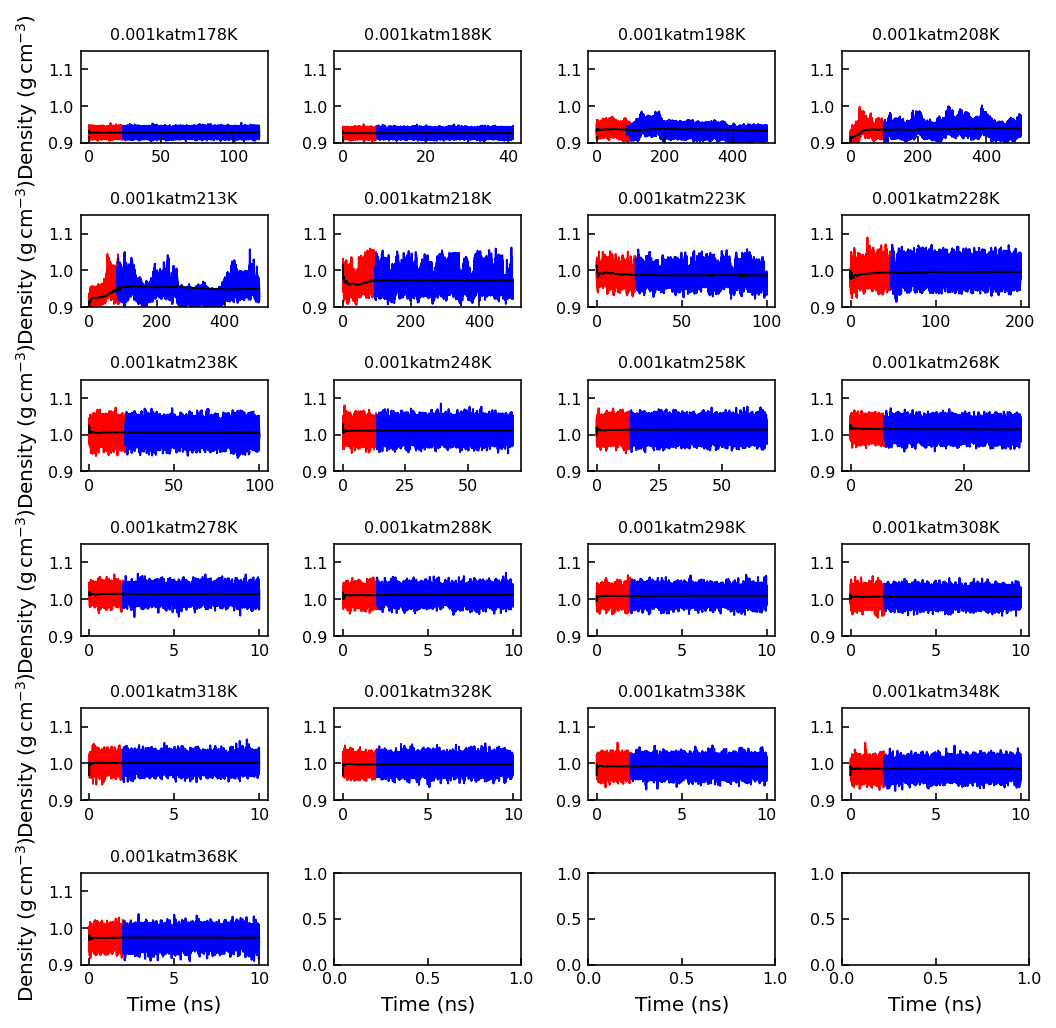

In [10]:

# fig, ax = plt.subplots(int(np.ceil(len(DATA)/4.)),4,figsize=(7.2,7))
# axs=ax.flatten()
# for i, key in enumerate(sorted(DATA.keys())):
#     nframes=len(DATA[key]['density'])
#     axs[i].plot(DATA[key]['time'][:int(nframes*IGNORE_PERCENT/100.)],DATA[key]['density'][:int(nframes*IGNORE_PERCENT/100.)],color='r')

#     axs[i].plot(DATA[key]['time'][int(nframes*IGNORE_PERCENT/100.):],DATA[key]['density'][int(nframes*IGNORE_PERCENT/100.):],color='b')
#     axs[i].plot(DATA[key]['time'],cum_avg(DATA[key]['density']),color='k')
#     axs[i].set_ylim(top=1.15,bottom=0.9)
#     axs[i].set_title(key.replace('_',''))
# plt.tight_layout()

# for i in range(ax.shape[0]):
#     ax[i,0].set_ylabel('Density (g$\,$cm$^{-3}$)')
    
# for j in range(ax.shape[1]):
#     ax[-1,j].set_xlabel('Time (ns)')
# plt.savefig('TIME_EVOLUTION.png',dpi=300,  bbox_inches='tight',facecolor='white', pad_inches=0.01)
